# **Import library**

In [1]:
import roboticstoolbox as rtb
import numpy as np
import matplotlib.pyplot as plt
from spatialmath import SE3

# **Define MDH-parameter and create robot from robotics toolbox**

In [2]:
# Define the robot using Modified Denavit-Hartenberg parameters
mdh = [[0.0, 0.0, 0.2, 0], [0.0, np.pi/2.0, 0.12, np.pi/2.0], [0.25, 0.0, -0.1, -np.pi/2.0]]
revjoint = []

# Create revolute joints based on MDH parameters
for data in mdh:
    revjoint.append(rtb.RevoluteMDH(a=data[0], alpha=data[1], d=data[2], offset=data[3])) # Append each revolute joint

# Create a DHRobot object representing a 3-DOF robot arm
robot = rtb.DHRobot(
    [
        revjoint[0],
        revjoint[1],
        revjoint[2]
    ],
    tool = SE3.Rx(-np.pi/2) * SE3.Tz(0.28),
    name="3R robot"
)
print(robot)

DHRobot: 3R robot, 3 joints (RRR), dynamics, modified DH parameters
┌──────┬───────┬───────────┬──────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │    θⱼ     │  dⱼ  │
├──────┼───────┼───────────┼──────┤
│  0.0 │  0.0° │        q1 │  0.2 │
│  0.0 │ 90.0° │  q2 + 90° │ 0.12 │
│ 0.25 │  0.0° │  q3 - 90° │ -0.1 │
└──────┴───────┴───────────┴──────┘

┌──────┬────────────────────────────────────────┐
│ tool │ t = 0, 0.28, 0; rpy/xyz = 0°, 0°, -90° │
└──────┴────────────────────────────────────────┘



# **Find and show workspace**

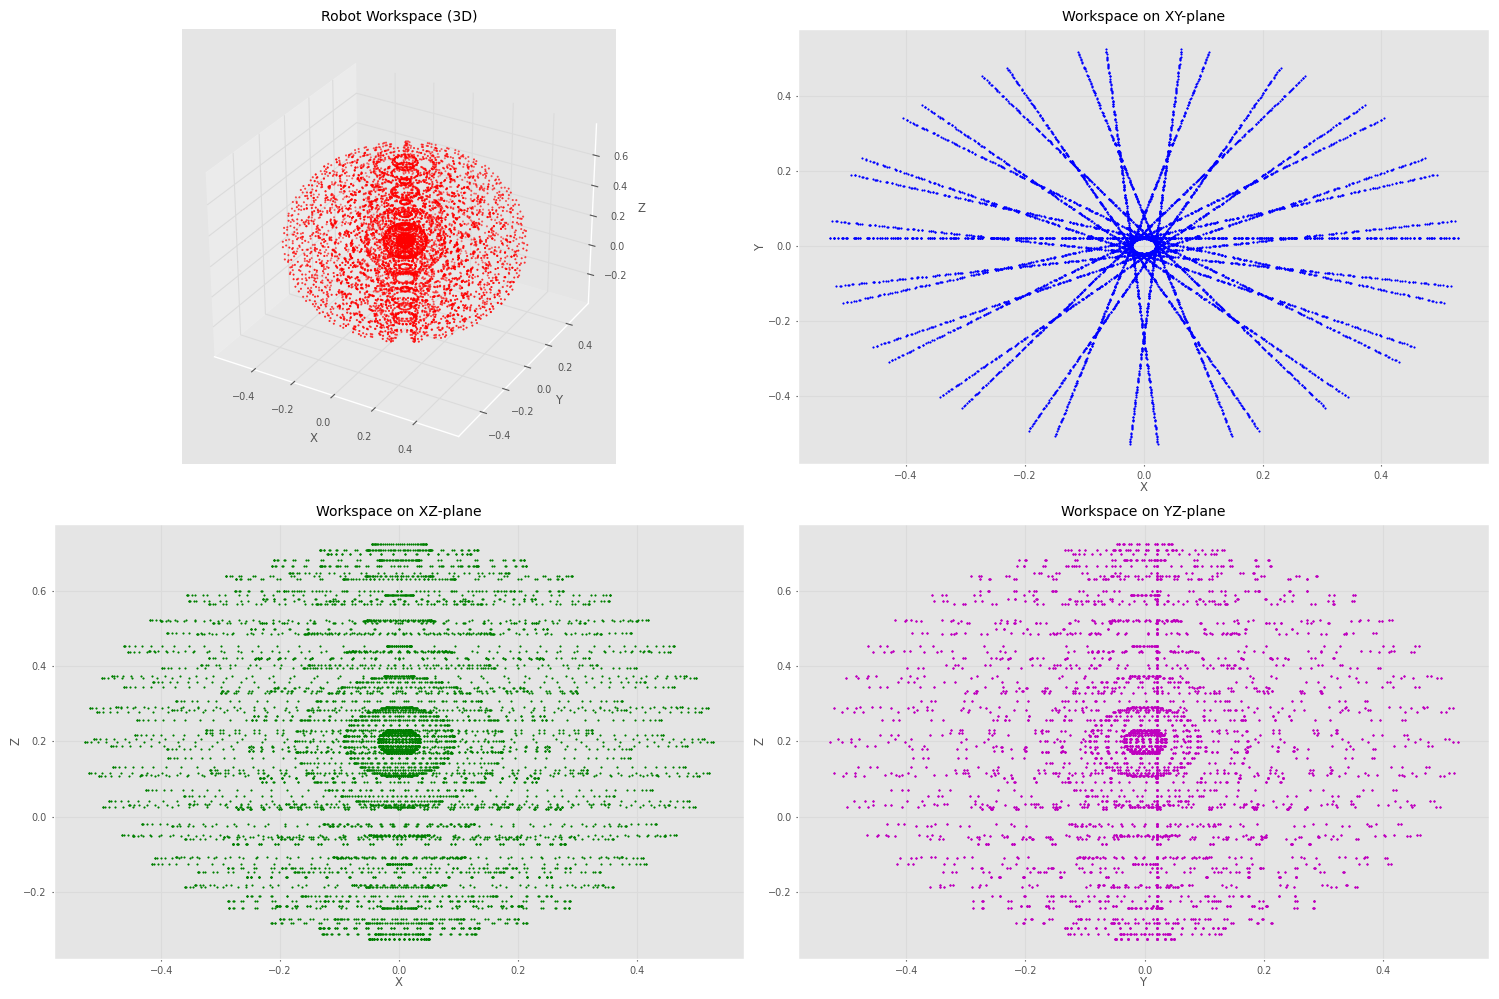

In [3]:
# Define the joint limits manually (adjust based on your robot's actual limits)
joint_limits = [
    [-np.pi, np.pi],        # Joint 1 limits
    [-np.pi, np.pi],        # Joint 2 limits
    [-np.pi, np.pi],        # Joint 3 limits
]

# Number of divisions for each joint (sampling resolution)
ws_division = 20
num_points = ws_division ** len(joint_limits)

# Prepare to store the workspace points
workspace_points = np.zeros((num_points, 3))

# Generate the workspace points
axes_indices = np.zeros(len(joint_limits), dtype=int)

for i in range(num_points):
    # Calculate joint angles based on current indices
    joint_angles = [joint_limits[j][0] + axes_indices[j] * (joint_limits[j][1] - joint_limits[j][0]) / (ws_division - 1)
                    for j in range(len(joint_limits))]

    # Compute forward kinematics
    T = robot.fkine(joint_angles)
    
    # Store the end-effector position (translation part of the transformation matrix)
    workspace_points[i, :] = T.t[:3].flatten()

    # Update indices for the next set of joint angles
    axes_indices[0] += 1
    for j in range(len(joint_limits)):
        if axes_indices[j] >= ws_division:
            axes_indices[j] = 0
            if j + 1 < len(joint_limits):
                axes_indices[j + 1] += 1

# Plot the workspace in 3D and on the three planes: XY, XZ, YZ
fig = plt.figure(figsize=(15, 10))

# 3D scatter plot of workspace points
ax_3d = fig.add_subplot(221, projection='3d')
ax_3d.scatter(workspace_points[:, 0], workspace_points[:, 1], workspace_points[:, 2], c='r', marker='o', s=1)
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')
ax_3d.set_title('Robot Workspace (3D)')

# XY-plane
ax_xy = fig.add_subplot(222)
ax_xy.scatter(workspace_points[:, 0], workspace_points[:, 1], c='b', marker='o', s=1)
ax_xy.set_xlabel('X')
ax_xy.set_ylabel('Y')
ax_xy.set_title('Workspace on XY-plane')

# XZ-plane
ax_xz = fig.add_subplot(223)
ax_xz.scatter(workspace_points[:, 0], workspace_points[:, 2], c='g', marker='o', s=1)
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.set_title('Workspace on XZ-plane')

# YZ-plane
ax_yz = fig.add_subplot(224)
ax_yz.scatter(workspace_points[:, 1], workspace_points[:, 2], c='m', marker='o', s=1)
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.set_title('Workspace on YZ-plane')

# Show the plots
plt.tight_layout()
plt.show()

In [4]:
# Calculate the radius of each point in the workspace
radii = np.linalg.norm(workspace_points, axis=1)

# Find the minimum and maximum radius
min_radius = np.min(radii)
max_radius = np.max(radii)

print(f"Minimum Radius: {min_radius}")
print(f"Maximum Radius: {max_radius}")

Minimum Radius: 0.035803525095895204
Maximum Radius: 0.7280293351346864
